# The Taylor Swift analysis project

In [66]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
# Read the data
df = pd.read_csv(r'taylor_swift_discography.csv',on_bad_lines='warn',sep=';')

In [68]:
df

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Welcome To New York (Taylor's Version),Dance Pop,B-Side,212600,No,No,0,102.221.045,6,...,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,3.66e-05,0.3670,-4.840,0.0327,116.998,0.685
1,1,Blank Space (Taylor's Version),Electropop,B-Side,231833,No,No,0,151.282.408,3,...,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.0,0.1680,-5.376,0.0670,96.057,0.701
2,2,Style (Taylor's Version),Synth Pop,B-Side,231000,No,No,0,182.418.311,1,...,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.0197,0.0899,-4.785,0.0397,94.868,0.305
3,3,Out Of The Woods (Taylor's Version),Synth Pop,B-Side,235800,No,No,0,118.458.965,8,...,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,5.59e-05,0.3850,-5.968,0.0447,92.021,0.206
4,4,All You Had To Do Was Stay (Taylor's Version),Synth Pop,B-Side,193289,No,No,0,88.205.974,10,...,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.0,0.1310,-5.579,0.0317,96.997,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,Our Song,Country,Single,201106,No,Yes,214.767.237,328.676.348,0,...,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.111000,0.668,0.672,0.0,0.3290,-4.931,0.0303,89.011,0.539
526,526,I'm Only Me When I'm With You,Country Pop,B-Side,213053,No,Yes,41.410.315,49.912.790,0,...,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518
527,527,Invisible,Country Pop,B-Side,203226,No,No,0,34.315.147,0,...,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.637000,0.612,0.394,0.0,0.1470,-5.723,0.0243,96.001,0.233
528,528,A Perfectly Good Heart,Country Pop,B-Side,220146,No,No,0,25.204.096,0,...,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.003490,0.483,0.751,0.0,0.1280,-5.726,0.0365,156.092,0.268


In [70]:
# Check data
df.head()

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Welcome To New York (Taylor's Version),Dance Pop,B-Side,212600,No,No,0,102.221.045,6,...,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,3.66e-05,0.3670,-4.840,0.0327,116.998,0.685
1,1,Blank Space (Taylor's Version),Electropop,B-Side,231833,No,No,0,151.282.408,3,...,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.0,0.1680,-5.376,0.0670,96.057,0.701
2,2,Style (Taylor's Version),Synth Pop,B-Side,231000,No,No,0,182.418.311,1,...,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.0197,0.0899,-4.785,0.0397,94.868,0.305
3,3,Out Of The Woods (Taylor's Version),Synth Pop,B-Side,235800,No,No,0,118.458.965,8,...,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,5.59e-05,0.3850,-5.968,0.0447,92.021,0.206
4,4,All You Had To Do Was Stay (Taylor's Version),Synth Pop,B-Side,193289,No,No,0,88.205.974,10,...,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.0,0.1310,-5.579,0.0317,96.997,0.520


## Data cleaning

In [71]:
# Look for missing data
df.isna().sum()

ID                      0
track_name              0
track_musical_genre     0
track_type              0
duration_ms             0
feature                 0
track_videoclip         0
videoclip_views         0
spotify_streams         0
spotify_global_peak     0
album                   0
track_number            0
album_musical_genre     0
album_type              0
release_date            0
album_physical_sales    2
track_lyrics            0
track_theme             0
uri                     0
acousticness            0
danceability            0
energy                  0
instrumentalness        0
liveness                0
loudness                0
speechiness             0
tempo                   0
valence                 0
dtype: int64

In [72]:
# Check which ones are the tracks with the missing values
df[df['album_physical_sales'].isna()]

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
310,310,Wildest Dreams,Synth Pop,Single,220440,No,No,0,941.509.249,120,...,spotify:track:22C0JIVhFaczZ4t9heqREN,0.0692,0.550,0.688,0.00144,0.1060,-7.416,0.0897,139.997,0.465
312,312,Red,Pop Rock,Single,223093,No,No,0,251.775.054,34,...,spotify:track:4V9NuhKQcUFt4cgbynHV79,0.0779,0.605,0.899,0.000125,0.0911,-4.273,0.0423,124.985,0.647


In [73]:
# Checking album names where album_physical_sales are 0
df['album'][df['album_physical_sales']=='0'].unique()

array(["1989 (Taylor's Version) [Deluxe]", 'evermore (deluxe version)',
       'folklore (deluxe version)',
       'reputation Stadium Tour Surprise Song Playlist',
       'Live From Clear Channel Stripped 2008'], dtype=object)

The tracks are from surprise songs of the reputation Stadium Tour, so it's OK to say the physical sales are 0, because the album was not for sale.

In [74]:
# Fill na with 0
df = df.fillna('0')

In [75]:
# Check again for na
df.isna().sum()

ID                      0
track_name              0
track_musical_genre     0
track_type              0
duration_ms             0
feature                 0
track_videoclip         0
videoclip_views         0
spotify_streams         0
spotify_global_peak     0
album                   0
track_number            0
album_musical_genre     0
album_type              0
release_date            0
album_physical_sales    0
track_lyrics            0
track_theme             0
uri                     0
acousticness            0
danceability            0
energy                  0
instrumentalness        0
liveness                0
loudness                0
speechiness             0
tempo                   0
valence                 0
dtype: int64

In [76]:
# Check for duplicates
df[df.duplicated()]

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence


In [77]:
# Check data type
df.dtypes

ID                        int64
track_name               object
track_musical_genre      object
track_type               object
duration_ms               int64
feature                  object
track_videoclip          object
videoclip_views          object
spotify_streams          object
spotify_global_peak       int64
album                    object
track_number              int64
album_musical_genre      object
album_type               object
release_date             object
album_physical_sales     object
track_lyrics             object
track_theme              object
uri                      object
acousticness            float64
danceability            float64
energy                  float64
instrumentalness         object
liveness                float64
loudness                float64
speechiness             float64
tempo                   float64
valence                 float64
dtype: object

The columns that need data type change are:
* instrumentalness: object to float
* videoclip_views: object to integer
* spotify_streams: objects to integer
* release_date: object to datetime
* album_physical_sales: object to integer

In [78]:
# Data from instrumentalness column is in scientific notation, so it'll not be posible to use astype, instead use pd.to_numeric
df['instrumentalness'].unique()

array(['3.66e-05', '0.0', '0.0197', '5.59e-05', '2.18e-05', '1.25e-05',
       '7.18e-05', '1.09e-05', '2.92e-05', '2.61e-05', '3.91e-06',
       '4.63e-06', '0.000199', '9.94e-06', '7.14e-05', '2.24e-05',
       '0.0214', '9.37e-05', '1.27e-05', '1.04e-05', '9.35e-05',
       '9.88e-06', '2.01e-05', '1.88e-05', '2.49e-06', '9.81e-06',
       '7.62e-05', '1.67e-05', '3.81e-05', '1.38e-06', '4.43e-06',
       '0.00113', '1.4e-06', '1.22e-06', '0.0013', '1.05e-05', '6.78e-05',
       '3.42e-05', '0.000128', '0.328', '0.00012', '0.000915', '2.78e-05',
       '0.00269', '3.07e-05', '0.00147', '0.00104', '4.73e-06', '3.5e-06',
       '0.0012', '1.23e-06', '0.00321', '8.47e-06', '6.51e-05',
       '1.74e-05', '0.000102', '0.348', '4.71e-05', '2.23e-05', '0.00648',
       '3.27e-05', '0.000575', '0.00145', '0.000573', '1.03e-06',
       '1.8e-06', '0.000993', '5.2e-06', '5.17e-05', '5.25e-05',
       '5.58e-05', '0.488', '7.72e-05', '0.00129', '1.62e-06', '0.000127',
       '0.00203', '1.02e-

In [79]:
# Change data type from instrumentalness
df['instrumentalness'] = pd.to_numeric(df['instrumentalness'], errors='coerce')

In [80]:
# Change data from videoclip_views
df['videoclip_views'] = df['videoclip_views'].str.replace('.', '').astype(int)

In [81]:
df['spotify_streams'].unique()

array(['102.221.045', '151.282.408', '182.418.311', '118.458.965',
       '88.205.974', '101.800.187', '77.667.730', '75.816.684',
       '695.045.271', '64.895.368', '238.858.492', '66.435.115',
       '86.966.267', '65.608.381', '67.947.237', '106.436.747',
       '239.579.759', '161.739.029', '243.929.951', '97.666.137',
       '327.037.965', '57.248.658', '161.201.338', '111.149.636',
       '180.262.965', '95.341.130', '99.582.468', '91.554.198',
       '89.206.080', '52.613.223', '256.720.162', '116.688.485',
       '44.117.403', '72.179.901', '72.138.383', '119.043.402',
       '50.628.387', '37.442.081', '79.599.951', '75.501.290',
       '233.537.019', '77.280.948', '85.579.355', '78.097.730',
       '685.569.376', '442.240.497', '1.497.861.842', '418.499.855',
       '558.461.539', '631.931.332', '289.677.180', '379.998.152',
       '511.571.475', '263.703.912', '737.680.743', '265.543.423',
       '328.656.338', '269.420.309', '175.821.082', '176.277.983',
       '148.303.28

In [82]:
# Change data from spotify_streams
df['spotify_streams'] = df['spotify_streams'].str.replace('.', '').astype(int)

In [83]:
# Change data from release_date 
df['release_date'] = pd.to_datetime(df['release_date'], dayfirst=True)

In [84]:
# Change data from album_physical_sales
df['album_physical_sales'] = df['album_physical_sales'].str.replace('.', '').astype(int)

In [85]:
# Check data types
df.dtypes

ID                               int64
track_name                      object
track_musical_genre             object
track_type                      object
duration_ms                      int64
feature                         object
track_videoclip                 object
videoclip_views                  int64
spotify_streams                  int64
spotify_global_peak              int64
album                           object
track_number                     int64
album_musical_genre             object
album_type                      object
release_date            datetime64[ns]
album_physical_sales             int64
track_lyrics                    object
track_theme                     object
uri                             object
acousticness                   float64
danceability                   float64
energy                         float64
instrumentalness               float64
liveness                       float64
loudness                       float64
speechiness              

In [86]:
# Sort values by release date, so we have the albums in order
df = df.sort_values(by='release_date').reset_index()

In [87]:
# Create a new column with tracks duration in minutes
df['duration_min'] = df['duration_ms']/60000

In [88]:
# Checking for problems to create new df with a resumed info of the albums
df[['album', 'album_physical_sales','album_musical_genre','album_type','release_date']].drop_duplicates()

,album,album_physical_sales,album_musical_genre,album_type,release_date
0,Taylor Swift,5871000,Country,Original Studio,2006-10-24
15,Live From Clear Channel Stripped 2008,0,Country,Live,2008-06-28
23,Fearless Platinum Edition,1150000,Country Pop,Compilation/Deluxe,2008-11-11
41,Fearless,6636000,Country Pop,Original Studio,2008-11-11
55,Speak Now World Tour Live,376000,Country Pop,Live,2010-10-25
58,Speak Now (Deluxe Edition),855000,Country Pop,Compilation/Deluxe,2010-10-25
79,Speak Now,3962000,Country Pop,Original Studio,2010-10-25
93,Speak Now,855000,Country Pop,Original Studio,2010-10-25
105,Red (Deluxe Edition),650000,Pop,Compilation/Deluxe,2012-10-22
125,Red,4551000,Pop,Original Studio,2012-10-22


In [89]:
df[df['album'] == 'Speak Now'].shape[0]

14

Theres a problem with 'Speak Now' and 'Midnights (The Til Dawn Edition)'.

In [90]:
# Check Speak now album
print('Number of songs of Speak Now that has 855000 physical sales: {}'.format(df[(df['album'] == 'Speak Now') & (df['album_physical_sales'] == 855000)].shape[0]))
print('Number of songs of Speak Now that has 3962000 physical sales: {}'.format(df[(df['album'] == 'Speak Now') & (df['album_physical_sales'] == 3962000)].shape[0]))
print('Total of songs in Speak Now: {}'.format(df[df['album'] == 'Speak Now'].shape[0]))

Number of songs of Speak Now that has 855000 physical sales: 1
Number of songs of Speak Now that has 3962000 physical sales: 13
Total of songs in Speak Now: 14


In [91]:
# Check Midnights (The Til Dawn Edition) album
print('Number of songs of Midnights (The Til Dawn Edition) that has 282000 physical sales: {}'.format(df[(df['album'] == 'Midnights (The Til Dawn Edition)') & (df['album_physical_sales'] == 282000)].shape[0]))
print('Number of songs of Midnights (The Til Dawn Edition) that has 270000 physical sales: {}'.format(df[(df['album'] == 'Midnights (The Til Dawn Edition)') & (df['album_physical_sales'] == 270000)].shape[0]))
print('Total of songs in Midnights (The Til Dawn Edition): {}'.format(df[df['album'] == 'Midnights (The Til Dawn Edition)'].shape[0]))

Number of songs of Midnights (The Til Dawn Edition) that has 282000 physical sales: 13
Number of songs of Midnights (The Til Dawn Edition) that has 270000 physical sales: 10
Total of songs in Midnights (The Til Dawn Edition): 23


As there are two possible values for 'Speak Now' (855000 or 3962000) but there's only one song of that album that has 855000, and considering that all of the songs of 'Speak Now (Deluxe Edition)' have 855000 physical sales, we will consider that 'Speak Now' has 3962000 physical sales.

And, as there are two possible values for 'Midnights (The Til Dawn Edition)' (282000 or 270000) but there's only 10 songs of that album that has 270000, and considering that all of the songs of 'Midnights (3am Edition)' have 270000 physical sales, we will consider that 'Midnights (The Til Dawn Edition)' has 282000 physical sales.

In [92]:
# Changing the Speak Now physical sales
df.loc[df['album'] == 'Speak Now','album_physical_sales'] = 3962000

In [93]:
# Changing the physical sales of the album 'Midnights (The Til Dawn Edition)'
df.loc[ df['album'] == 'Midnights (The Til Dawn Edition)', 'album_physical_sales'] = 282000

In [94]:
# Create an aux to create a df with album info only
df_aux1 = df[['album', 'album_physical_sales','album_musical_genre','album_type','release_date']].drop_duplicates()

In [95]:
df_aux1

,album,album_physical_sales,album_musical_genre,album_type,release_date
0,Taylor Swift,5871000,Country,Original Studio,2006-10-24
15,Live From Clear Channel Stripped 2008,0,Country,Live,2008-06-28
23,Fearless Platinum Edition,1150000,Country Pop,Compilation/Deluxe,2008-11-11
41,Fearless,6636000,Country Pop,Original Studio,2008-11-11
55,Speak Now World Tour Live,376000,Country Pop,Live,2010-10-25
58,Speak Now (Deluxe Edition),855000,Country Pop,Compilation/Deluxe,2010-10-25
79,Speak Now,3962000,Country Pop,Original Studio,2010-10-25
105,Red (Deluxe Edition),650000,Pop,Compilation/Deluxe,2012-10-22
125,Red,4551000,Pop,Original Studio,2012-10-22
143,1989 (Deluxe Edition),555000,Pop,Compilation/Deluxe,2014-10-27


In [96]:
# Create a second aux df with info of the tracks number of each album
df_aux2 = df['album'].value_counts().reset_index()
df_aux2.columns = ['album', 'number_of_tracks']
df_aux2

,album,number_of_tracks
0,reputation Stadium Tour Surprise Song Playlist,46
1,folklore: the long pond studio sessions (from ...,34
2,Red (Taylor's Version),30
3,Fearless (Taylor's Version),26
4,Midnights (The Til Dawn Edition),23
5,Speak Now (Taylor's Version),22
6,1989 (Taylor's Version) [Deluxe],22
7,Red (Deluxe Edition),22
8,1989 (Taylor's Version),21
9,Speak Now (Deluxe Edition),20


In [97]:
# Create a third aux df with info of the duration in minutes of each album
df_aux3 = df.groupby('album')['duration_ms'].sum().reset_index()
df_aux3['duration_min'] = df_aux3['duration_ms']/60000
df_aux3 = df_aux3.drop('duration_ms', axis = 1)
df_aux3

 

,album,duration_min
0,1989,48.797733
1,1989 (Deluxe Edition),68.760800
2,1989 (Taylor's Version),77.972117
3,1989 (Taylor's Version) [Deluxe],81.301667
4,Fearless,53.547900
5,Fearless (Taylor's Version),106.541500
6,Fearless Platinum Edition,79.443683
7,Live From Clear Channel Stripped 2008,27.929250
8,Lover,61.856350
9,Midnights,44.138967


In [98]:
# Finally, create the df with a resumed info of the albums
df_albums = pd.merge(pd.merge(df_aux1,df_aux2,on='album'),df_aux3,on='album')

In [99]:
df_albums.head()

,album,album_physical_sales,album_musical_genre,album_type,release_date,number_of_tracks,duration_min
0,Taylor Swift,5871000,Country,Original Studio,2006-10-24,15,53.492783
1,Live From Clear Channel Stripped 2008,0,Country,Live,2008-06-28,8,27.929250
2,Fearless Platinum Edition,1150000,Country Pop,Compilation/Deluxe,2008-11-11,19,79.443683
3,Fearless,6636000,Country Pop,Original Studio,2008-11-11,13,53.547900
4,Speak Now World Tour Live,376000,Country Pop,Live,2010-10-25,16,79.232317


## Analysis

### General analysis of the dataframe

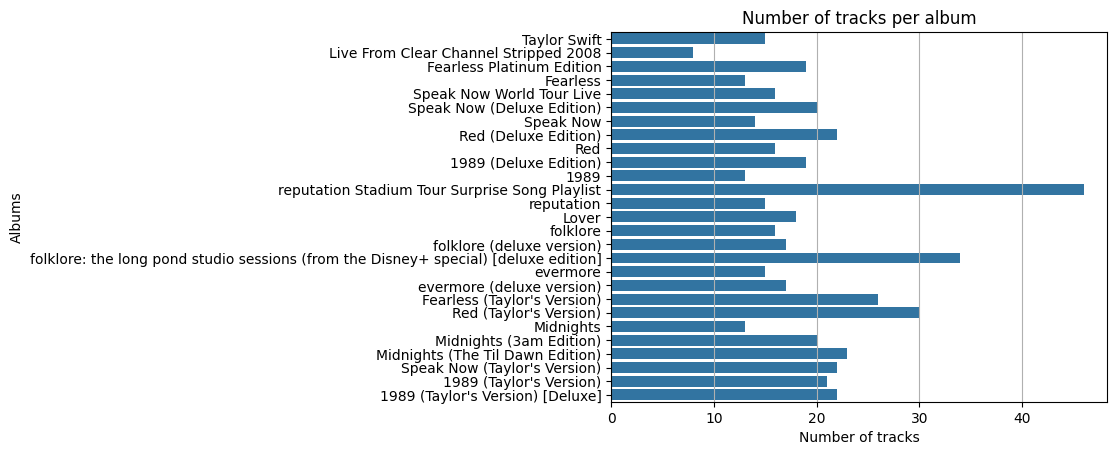

In [100]:
# Number of tracks per album
sns.barplot(data = df_albums, y = 'album', x = 'number_of_tracks')
plt.title('Number of tracks per album')
plt.xlabel('Number of tracks')
plt.ylabel('Albums')
plt.grid(axis='x')
plt.show()

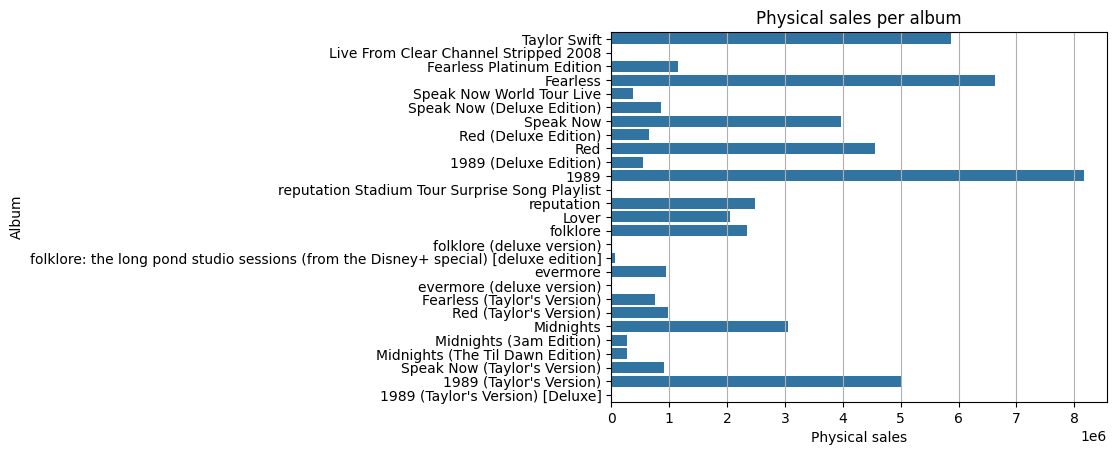

In [101]:
# Physical sales per album
sns.barplot(data = df_albums, y = 'album', x = 'album_physical_sales')
plt.title('Physical sales per album')
plt.xlabel('Physical sales')
plt.ylabel('Album')
plt.grid(axis='x')
plt.show()

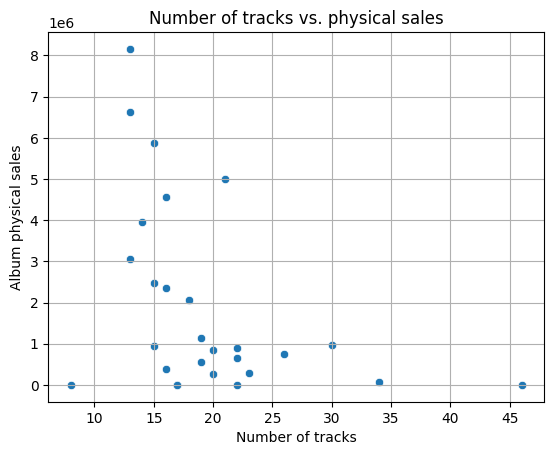

In [102]:
# Relation between number of tracks and physical sales of albums
sns.scatterplot(data = df_albums, x= 'number_of_tracks', y = 'album_physical_sales')
plt.title('Number of tracks vs. physical sales')
plt.xlabel('Number of tracks')
plt.ylabel('Album physical sales')
plt.grid()
plt.show()

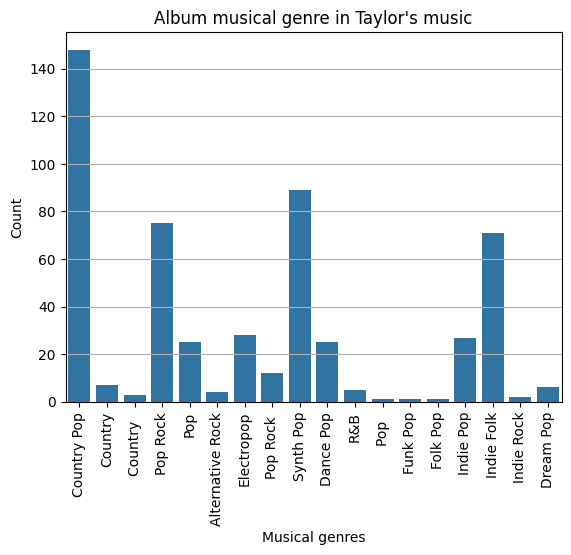

In [103]:
# Genres most used by Taylor Swift
sns.countplot(data = df, x = 'track_musical_genre')
plt.xticks(rotation=90)
plt.title('Album musical genre in Taylor\'s music')
plt.xlabel('Musical genres')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

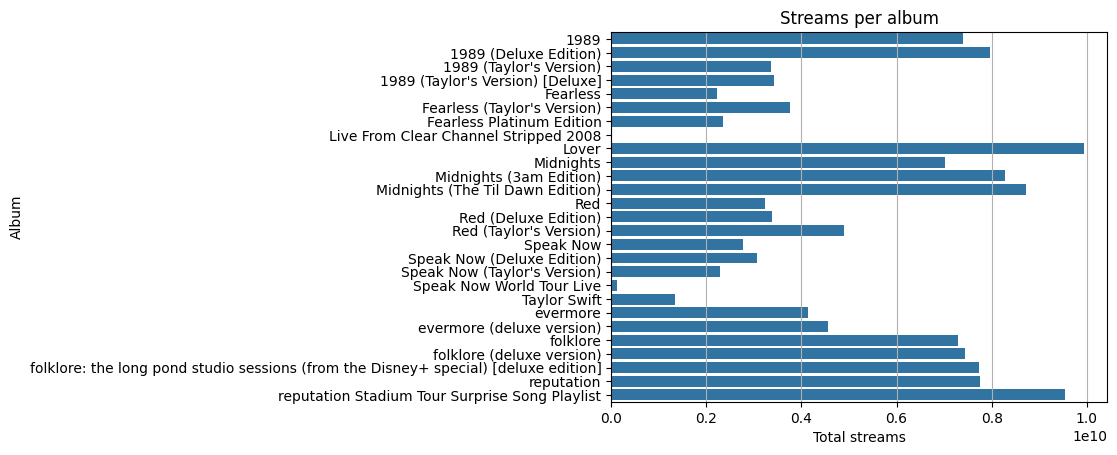

In [104]:
# Most streamed albums
sns.barplot(data = df.groupby(['album']).agg(total_streams = ('spotify_streams','sum')).reset_index(), y = 'album', x = 'total_streams')
plt.title('Streams per album')
plt.xlabel('Total streams')
plt.ylabel('Album')
plt.grid(axis='x')
plt.show()

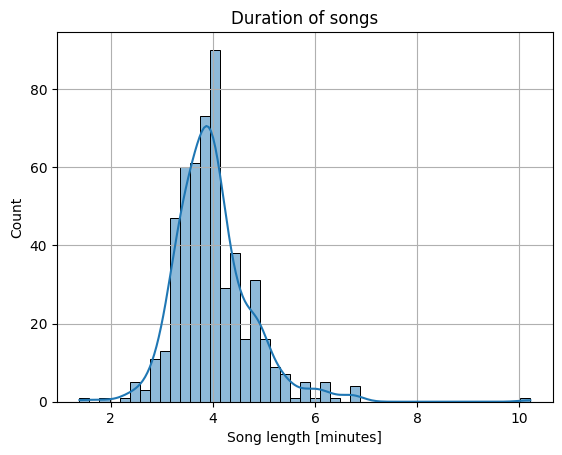

In [105]:
# Distribution of the duration of Taylor's songs
sns.histplot(data = df, x = 'duration_min', kde = True)
plt.title('Duration of songs')
plt.xlabel('Song length [minutes]')
plt.grid()
plt.show()

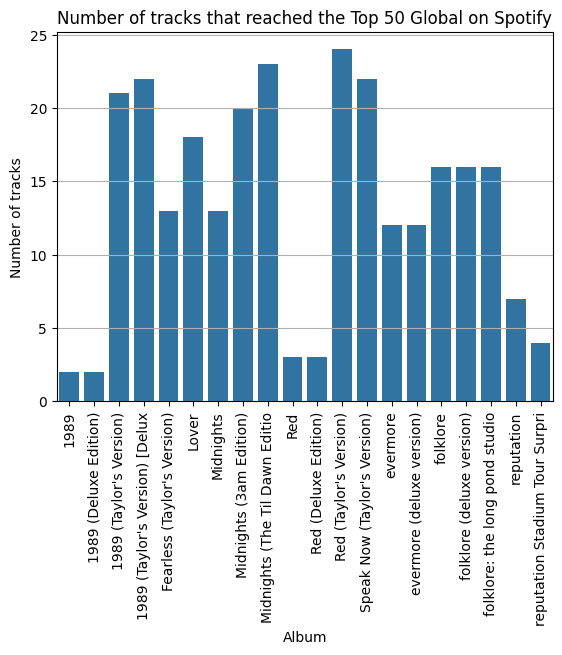

In [106]:
# Number of tracks that reached the Top 50 Global of Spotify per album
peaks = df[(df['spotify_global_peak'] <= 50) & (df['spotify_global_peak'] != 0)].groupby('album')['spotify_global_peak'].count().reset_index()
sns.barplot(data = peaks, x = 'album', y = 'spotify_global_peak' )
#plt.xticks(rotation = 90)
plt.xticks(ticks=range(len(peaks['album'])), labels=[label[:30] for label in peaks['album']], rotation=90)
plt.title('Number of tracks that reached the Top 50 Global on Spotify')
plt.xlabel('Album')
plt.ylabel('Number of tracks')
plt.grid(axis='y')
plt.show()

In [107]:
# Relation between the track number and the Spotify streams of each song, coloured by album
px.scatter(df,x = 'track_number', y = 'spotify_streams', 
           color = 'album',
           title='Spotify streams vs track number',
           labels={'track_number' : 'Track number', 'spotify_streams' : 'Spotify streams', 'album' : 'Album'})

In [108]:
# Relation between the length of each song and the Spotify streams, coloured by track theme
px.scatter(df,x = 'duration_min', y = 'spotify_streams', 
           color = 'track_theme',
           title='Song length vs spotify streams',
           labels={'duration_min' : 'Song length [minutes]', 'spotify_streams' : 'Spotify streams', 'track_theme' : 'Track theme'})

### Analysis of Original Studio and Re-recording albums

In [109]:
# Filter by original studio and re-recording albums
filter = df_albums[(df_albums['album_type'] == 'Original Studio') | (df_albums['album_type'] == 'Re-recording')]
filter


,album,album_physical_sales,album_musical_genre,album_type,release_date,number_of_tracks,duration_min
0,Taylor Swift,5871000,Country,Original Studio,2006-10-24,15,53.492783
3,Fearless,6636000,Country Pop,Original Studio,2008-11-11,13,53.547900
6,Speak Now,3962000,Country Pop,Original Studio,2010-10-25,14,67.032800
8,Red,4551000,Pop,Original Studio,2012-10-22,16,64.923233
10,1989,8158000,Pop,Original Studio,2014-10-27,13,48.797733
12,reputation,2478000,Electropop,Original Studio,2017-11-10,15,55.755000
13,Lover,2061000,Pop,Original Studio,2019-08-23,18,61.856350
14,folklore,2352000,Indie Folk,Original Studio,2020-07-24,16,63.609783
17,evermore,944000,Indie Folk,Original Studio,2020-12-11,15,60.753500
19,Fearless (Taylor's Version),755000,Country Pop,Re-recording,2021-04-09,26,106.541500


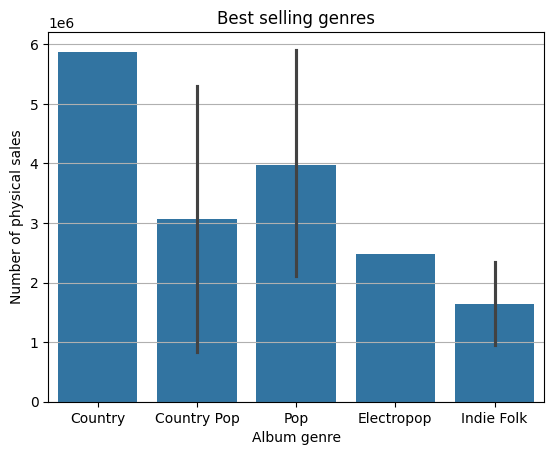

In [110]:
# Which album genres are the best selling?
sns.barplot(data = filter, x = 'album_musical_genre', y = 'album_physical_sales')
plt.title('Best selling genres')
plt.xlabel('Album genre')
plt.ylabel('Number of physical sales')
plt.grid(axis='y')
plt.show()

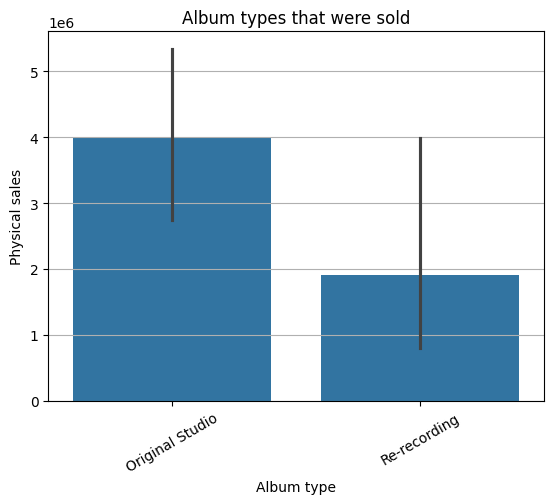

In [111]:
# How many of each album type were sold?
sns.barplot(data = filter, x = 'album_type', y = 'album_physical_sales')
plt.xticks(rotation = 30)
plt.title('Album types that were sold')
plt.xlabel('Album type')
plt.ylabel('Physical sales')
plt.grid(axis='y')
plt.show()

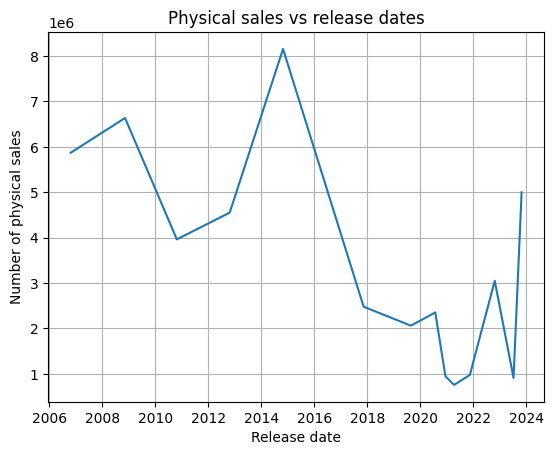

In [112]:
# Sales through time
sns.lineplot(data = filter, x = 'release_date', y='album_physical_sales')
plt.title('Physical sales vs release dates')
plt.xlabel('Release date')
plt.ylabel('Number of physical sales')
plt.grid()
plt.show()

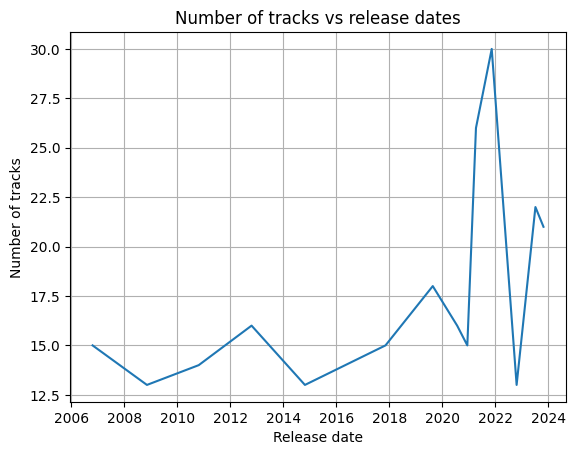

In [113]:
# Number of tracks through time
sns.lineplot(data = filter, x = 'release_date', y='number_of_tracks')
plt.title('Number of tracks vs release dates')
plt.xlabel('Release date')
plt.ylabel('Number of tracks')
plt.grid()
plt.show()

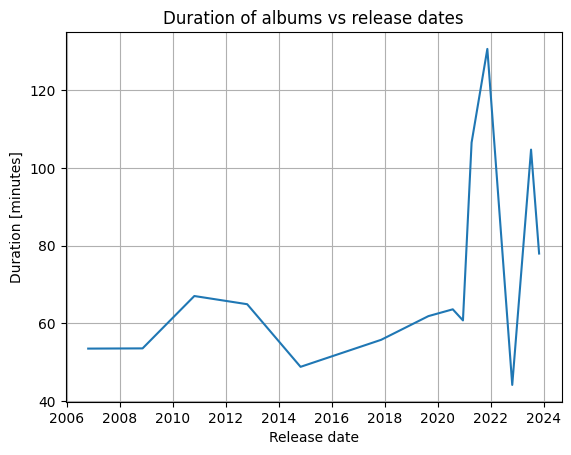

In [114]:
# Duration of albums through time
sns.lineplot(data = filter, x = 'release_date', y='duration_min')
plt.title('Duration of albums vs release dates')
plt.xlabel('Release date')
plt.ylabel('Duration [minutes]')
plt.grid()
plt.show()

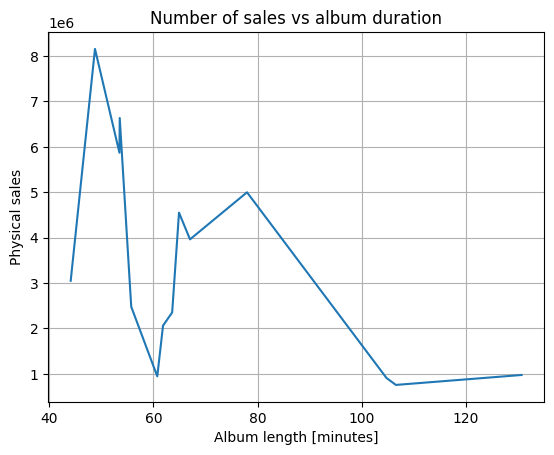

In [115]:
# Sales vs duration
sns.lineplot(data = filter, x = 'duration_min', y='album_physical_sales')
plt.title('Number of sales vs album duration')
plt.xlabel('Album length [minutes]')
plt.ylabel('Physical sales')
plt.grid()
plt.show()

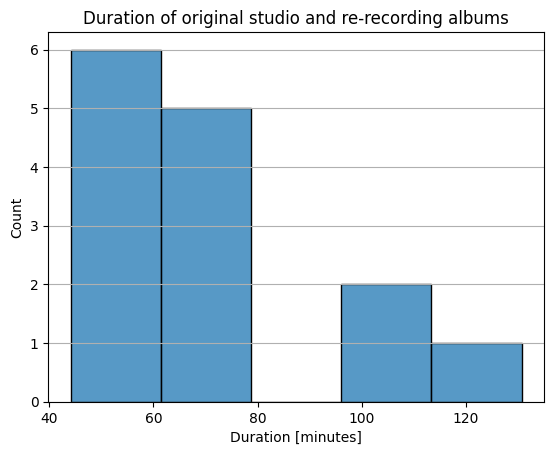

In [116]:
# Duration of albums
sns.histplot(data = filter, x = 'duration_min')
plt.title('Duration of original studio and re-recording albums')
plt.xlabel('Duration [minutes]')
plt.grid(axis='y')
plt.show()


### Analysis of spotify parameters

In [117]:
# Track themes by album
px.bar(df, x='track_theme',
       title='Track themes in Taylor\'s discography',
       labels={'track_theme' : 'Track theme', 'album': 'Album', 'count': 'Count'},
       color='album')

In [118]:
# Acousticness on albums
fig_acousticness = px.bar(df, x = 'album', y = 'acousticness',
       color = 'track_theme',
       title= 'Acousticness on albums',
       labels= {'album':'Album', 'acousticness': 'Acousticness', 'track_theme' : 'Track theme'})

fig_acousticness.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_acousticness.show()

In [119]:
# Danceability on albums
fig_danceability = px.bar(df, x = 'album', y = 'danceability',
       color = 'track_theme',
       title= 'Danceability on albums', 
       labels= {'album':'Album', 'danceability': 'Danceability', 'track_theme' : 'Track theme'})

fig_danceability.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_danceability.show()

In [120]:
# Energy on albums
fig_energy = px.bar(df, x = 'album', y = 'energy',
       color = 'track_theme',
       title= 'Energy on albums', 
       labels= {'album':'Album', 'energy': 'Energy','track_theme' : 'Track theme'})

fig_energy.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_energy.show()

In [121]:
# Instrumentalness on albums
fig_instrumentalness = px.bar(df, x = 'album', y = 'instrumentalness',
       color = 'track_theme',
       title= 'Instrumentalness on albums', 
       labels= {'album':'Album', 'instrumentalness': 'Instrumentalness', 'track_theme' : 'Track theme'})

fig_instrumentalness.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_instrumentalness.show()

In [122]:
# Liveness on albums
fig_liveness = px.bar(df, x = 'album', y = 'liveness',
       color = 'track_theme',
       title= 'Liveness on albums', 
       labels= {'album':'Album', 'Liveness': 'liveness','track_theme' : 'Track theme'})

fig_liveness.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_liveness.show()

In [123]:
# Loudness on albums
fig_loudness = px.bar(df, x = 'album', y = 'loudness',
       color = 'track_theme',
       title= 'Loudness on albums', 
       labels= {'album':'Album', 'loudness': 'Loudness [dB]','track_theme' : 'Track theme'})

fig_loudness.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_loudness.show()

In [124]:
# Speechiness on albums
fig_speechiness = px.bar(df, x = 'album', y = 'speechiness',
       color = 'track_theme',
       title= 'Speechiness on albums', 
       labels= {'album':'Album', 'speechiness': 'speechiness','track_theme' : 'Track theme'})

fig_speechiness.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_speechiness.show()

In [125]:
# Tempo on albums
fig_tempo = px.bar(df, x = 'album', y = 'tempo',
       color = 'track_theme',
       title= 'Tempo on albums', 
       labels= {'album':'Album', 'tempo': 'Tempo [bpm]','track_theme' : 'Track theme'})

fig_tempo.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_tempo.show()

In [126]:
# Valence on albums
fig_valence = px.bar(df, x = 'album', y = 'valence',
       color = 'track_theme',
       title= 'Valence on albums', 
       labels= {'album':'Album', 'valence': 'Valence','track_theme' : 'Track theme'})

fig_valence.update_layout(
       xaxis_tickvals=df['album'],
       xaxis_ticktext=[album[:30] for album in df['album']],
       xaxis=dict(tickangle=45))

fig_valence.show()

### Top songs

In [127]:
# Top 10 most streamed songs
top_stream = df.sort_values(by='spotify_streams', ascending=False).drop_duplicates(subset='track_name').head(10)
px.bar(top_stream, y = 'spotify_streams', x = 'track_name',
       title= 'Top 10 most streamed songs',
       labels= {'track_name': 'Track name', 'spotify_streams' : 'Spotify streams', 'track_musical_genre' : 'Musical genre'},
       color='track_musical_genre')

In [128]:
# Top 10 most streamed songs with features
top_feature = df[df['feature'] != 'No'].sort_values(by='spotify_streams', ascending=False).drop_duplicates(subset='track_name').head(10)
px.bar(top_feature, y = 'spotify_streams', x = 'track_name',
       title= 'Top 10 most streamed songs with features',
       labels= {'track_name': 'Track name', 'spotify_streams' : 'Spotify streams', 'feature' : 'Featurer'},
       color='feature')

In [129]:
# Top 10 longest songs
top_duration = df.sort_values(by='duration_min', ascending=False).drop_duplicates(subset='track_name').head(10)
px.bar(top_duration, y = 'duration_min', x = 'track_name',
       title= 'Top 10 longest songs',
       labels= {'track_name': 'Track name', 'duration_min' : 'Duration [minutes]', 'album' : 'Album'},
       color='album')

In [130]:
# Top 10 most streamed songs with videoclip
top_feature = df[df['track_videoclip'] != 'No'].sort_values(by='spotify_streams', ascending=False).drop_duplicates(subset='track_name').head(10)
px.bar(top_feature, y = 'spotify_streams', x = 'track_name',
       title= 'Top 10 most streamed songs with videoclip',
       labels= {'track_name': 'Track name', 'spotify_streams' : 'Spotify streams', 'album' : 'Album'},
       color='album')